**1.Допустим, у вас есть файл с данными, который называется ‘iris.csv’. Этот файл находится в папке ‘/data/’. Вы открываете его 
в текстовом редакторе и видите следующие первые строки:**

sepal length in cm; sepal width in cm; petal length in

cm; petal width in cm; class

5.1; 3.5; 1.4; 0.2; 0

Как должна выглядеть команда для считывания данных в датафрейм Pandas?

Для считывания файла с разделителем ; в датафрейм Pandas, можно использовать следующую команду:

In [ ]:
import pandas as pd

df = pd.read_csv('/data/iris.csv', sep=';')

/data/iris.csv — путь к файлу.

sep=';' — указание разделителя, так как данные в файле разделены точкой с запятой.

Данная команда загрузит данные в датафрейм df с выше упомянутыми колонками

**2.Для набора данных Cars после удаления дубликатов выберите из полного датафрейма строки с индекса 69 по 322. Отсортируйте полученный датафрейм по колонке ‘Distance’ по убыванию. Какое значение колонки ‘Style’ у полученного датафрейма во второй строке сверху?**

Пример кода для выполнения этих действий:

In [4]:
import pandas as pd

# Чтение данных из CSV-файла
df = pd.read_csv('cars.csv')

# Удаление дубликатов
df = df.drop_duplicates()

# Выбор строк с индекса 69 по 322 (включительно)
subset_df = df.iloc[69:323]

# Сортировка по колонке 'Distance' по убыванию
sorted_df = subset_df.sort_values(by='Distance', ascending=False)

# Получение значения из колонки 'Style' во второй строке сверху
second_row_style = sorted_df.iloc[1]['Style']

# Вывод результата
print(f"Значение колонки 'Style' во второй строке сверху: {second_row_style}")

Значение колонки 'Style' во второй строке сверху: Minivan


pd.read_csv('cars.csv') — считывание данных из файла cars.csv.

drop_duplicates() — удаление всех дубликатов.

df.iloc[69:323] — выбор строк с 69 по 322 (индексы Python считаются с 0).

sort_values(by='Distance', ascending=False) — сортировка по колонке Distance в порядке убывания.

iloc[1]['Style'] — получение второй строки сверху из отсортированного датафрейма и извлечение значения в колонке Style.

**3.Для набора данных Cars оцените количество строк, которые 
были удалены после анализа гистограмм распределения и удаления аномальных значений.**


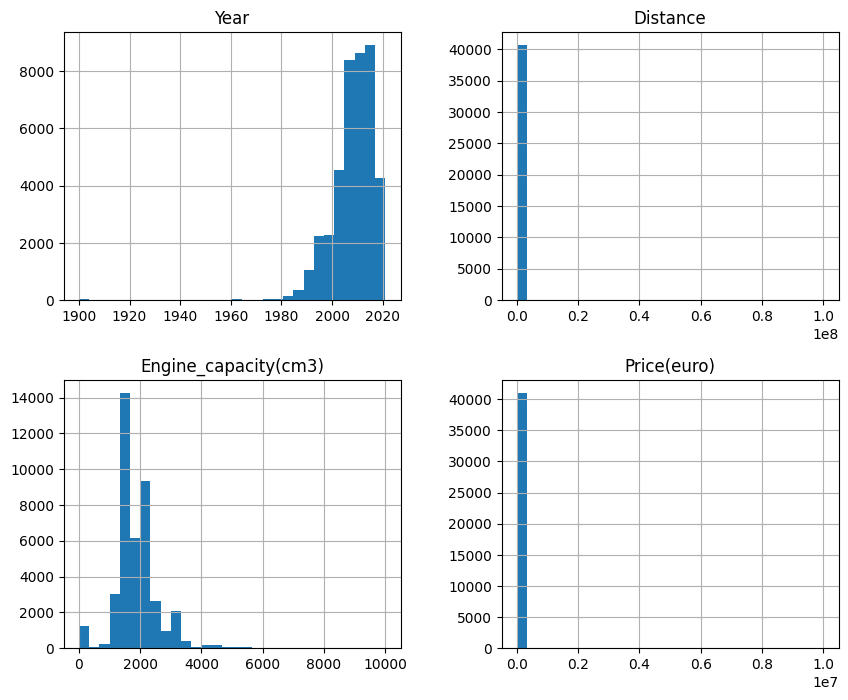

Количество удалённых строк: 1046


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Чтение данных из CSV-файла
df = pd.read_csv('cars.csv')

# 2. Построение гистограмм для визуального анализа распределений
df.hist(bins=30, figsize=(10, 8))
plt.show() #plt.show() — отображает построенные графики с использованием библиотеки matplotlib.pyplot

# 3. Удаление аномальных значений
# Пример: допустим, что аномальные значения - это значения, которые находятся за пределами 3 стандартных отклонений
# Вычисляем границы для удаления аномалий для каждого числового столбца
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    upper_limit = df[col].mean() + 3 * df[col].std() #это верхняя граница для допустимых значений (среднее значение + 3 стандартных отклонения).
    lower_limit = df[col].mean() - 3 * df[col].std() #это нижняя граница для допустимых значений (среднее значение - 3 стандартных отклонения).
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)] #оставляет в датафрейме только те строки, где значения в столбце находятся 
                                                                #в пределах от lower_limit до upper_limit, удаляя строки с выбросами.

# 4. Оценка количества удалённых строк
original_row_count = pd.read_csv('cars.csv').shape[0]  # Количество строк до удаления
remaining_row_count = df.shape[0]  # Количество строк после удаления
deleted_row_count = original_row_count - remaining_row_count #вычисляет количество удалённых строк как разницу между количеством строк до и 
                                                                                                                    #после удаления выбросов.

# 5. Вывод количества удалённых строк
print(f"Количество удалённых строк: {deleted_row_count}")


Чтение данных - Считываем данные из файла cars.csv.

Гистограммы - Построение гистограмм по всем числовым колонкам с использованием df.hist() для анализа распределения.

Удаление аномалий - В качестве примера, аномальными считаем значения, которые находятся за пределами 3 стандартных отклонений от среднего (метод "3 сигм"). Можно также использовать другие методы (квантили, межквартильный размах и т.д.).

Метод "3 сигм" (или правило трёх сигм) — это статистический метод для определения и удаления аномальных значений (выбросов) в данных. Он основывается на свойствах нормального распределения (Гауссово распределение), согласно которому около 99.7% всех значений находятся в пределах трёх стандартных отклонений (σ) от среднего значения (μ).

Оценка удалённых строк - Сравниваем количество строк до и после удаления аномалий. Разница даёт количество удалённых строк.

Вывод результата - Печатается количество удалённых строк.

**4.Для набора данных Cars назовите самую распространенную 
марку автомобилей (столбец Make).**

In [5]:
import pandas as pd

df = pd.read_csv('cars.csv')
counts = df.Make.value_counts()
counts

Make
Volkswagen      4304
Mercedes        3811
Toyota          3776
BMW             3221
Renault         2988
                ... 
Lamborghini        1
McLaren            1
Saturn             1
Aston Martin       1
Xpeng              1
Name: count, Length: 87, dtype: int64

**5.Визуализируйте скаттерограмму для двух столбцов — Distance и Year — набора данных Cars с использованием столбца 
Transmission в качестве цвета маркера (hue).
К какому типу Transmission относится точка, которая наиболее близка к координатам (Year = 1980, Distance = 500 000)?**

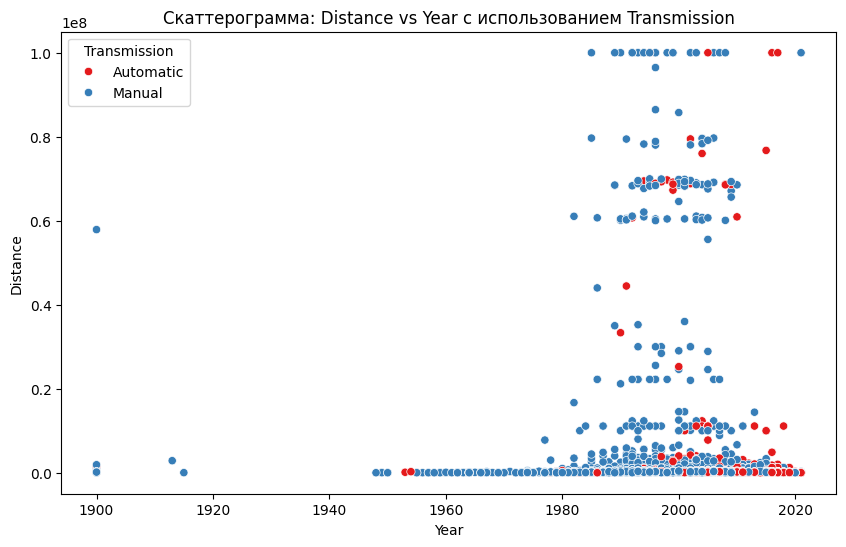

Точка, наиболее близкая к (Year = 1980, Distance = 500 000), относится к типу Transmission: Automatic


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV-файла
df = pd.read_csv('cars.csv')

# Шаг 2: Построение скаттерограммы для столбцов 'Distance' и 'Year', с использованием 'Transmission' в качестве hue
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Year', y='Distance', hue='Transmission', data=df, palette='Set1')

# Установка заголовков и меток
plt.title('Скаттерограмма: Distance vs Year с использованием Transmission')
plt.xlabel('Year')
plt.ylabel('Distance')

plt.show()

# Шаг 3: Нахождение точки, наиболее близкой к (Year = 1980, Distance = 500000)
target_point = np.array([1980, 500000])

# Вычисление евклидова расстояния от каждой точки до целевой
df['distance_to_target'] = np.sqrt((df['Year'] - target_point[0]) ** 2 + (df['Distance'] - target_point[1]) ** 2)

# Нахождение индекса строки с минимальным расстоянием до целевой точки
closest_point_idx = df['distance_to_target'].idxmin()

# Получение значения Transmission для этой строки
closest_transmission = df.loc[closest_point_idx, 'Transmission']

print(f"Точка, наиболее близкая к (Year = 1980, Distance = 500 000), относится к типу Transmission: {closest_transmission}")


**6.Представим, что вы визуализировали некий набор данных (рис. 2.10).
Какие новые признаки, основанные на имеющихся, необходимо сконструировать, чтобы иметь возможность отделить все 
красные точки от всех синих точек с помощью прямой линии?**

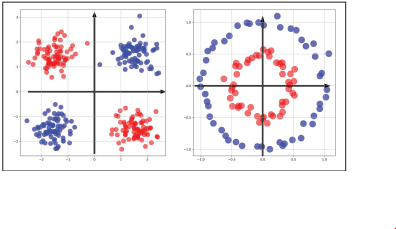

Чтобы построить такие признаки, нужно перейти от декартовых координат (X и Y) к полярным координатам или к признакам, которые описывают расстояние от центра.
Радиальное расстояние: Мы можем вычислить радиальное расстояние каждой точки от центра, используя формулу для радиуса:


 
где x и y — это координаты точки.

После этого, можно использовать радиус **r** в качестве нового признака. В таком случае красные точки будут иметь меньшие значения радиуса, а синие — большие. В пространстве этого нового признака уже можно провести линейную границу, которая отделит внутренние (красные) точки от внешних (синих).